In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json
from sqlalchemy import create_engine
#import pymysql

In [49]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration "
pandasDf =  pd.read_sql(insert_query, con=db_conn)

In [48]:
pandasDf['dataset'].unique()

array(['image_labeling', 'KAIST', 'neocr_dataset'], dtype=object)

In [ ]:
# KAIST neocr_dataset

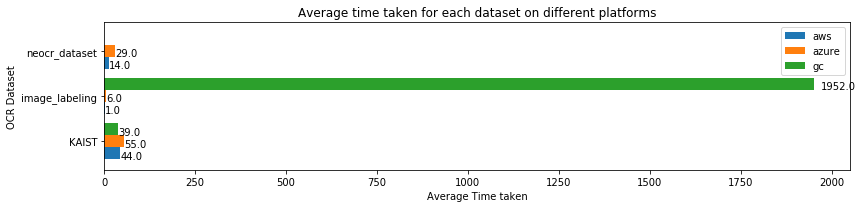

In [50]:
#pandasDf = pandasDf[(pandasDf['label']!='gc') &  (pandasDf['dataset']!='image_labeling')]
pdOcr = pandasDf[pandasDf['dataset'].isin(['KAIST', 'neocr_dataset', 'image_labeling'])]
pdOcrSuccess = pdOcr[pdOcr['status']!='0']
pdOcrSuccess.loc[pdOcrSuccess.label == 'aws-OCR', 'label'] = 'aws'
pdOcrSuccess.loc[pdOcrSuccess.label == 'azure-OCR', 'label'] = 'azure'
pdOcrSuccess.loc[pdOcrSuccess.label == 'gc-OCR', 'label'] = 'gc'
#pdOcrSuccess['score']=pdOcrSuccess['score'].astype('float64')
pdOcrSuccess['time']=pdOcrSuccess['time'].astype('float64')
pdOcrSuccess['status']=pdOcrSuccess['status'].astype('int32')

pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='status', aggfunc='count')

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

In [27]:
pdOcr = pandasDf[pandasDf['dataset'].isin(['KAIST', 'neocr_dataset'])]
pdOcrSuccess = pdOcr[pdOcr['status']!='0']
pdOcrSuccess.loc[pdOcrSuccess.label == 'aws-OCR', 'label'] = 'aws'
pdOcrSuccess.loc[pdOcrSuccess.label == 'azure-OCR', 'label'] = 'azure'
pdOcrSuccess.loc[pdOcrSuccess.label == 'gc-OCR', 'label'] = 'gc'
pdOcrSuccess['score']=pdOcrSuccess['score'].astype('float64')
pdOcrSuccess['time']=pdOcrSuccess['time'].astype('float64')
pdOcrSuccess['status']=pdOcrSuccess['status'].astype('int32')

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide

In [28]:
pdOcrSuccess['status'].unique()

array([-2, -4, -3])

In [ ]:
#pdOcrSuccess.replace('aws-OCR', 'aws')
display(pdOcrSuccess)

In [7]:
pdOcrSuccess['time'].mean()

1.0716496382088496

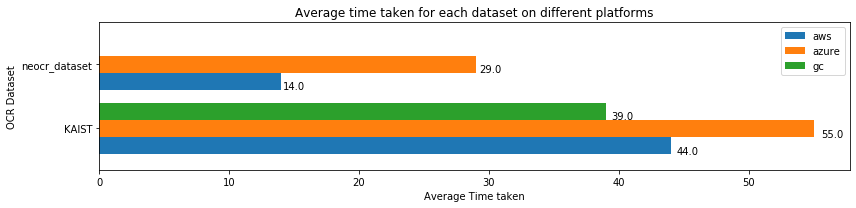

In [32]:
#plt.figure(figsize=(1, 1))
pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='status', aggfunc='count')

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

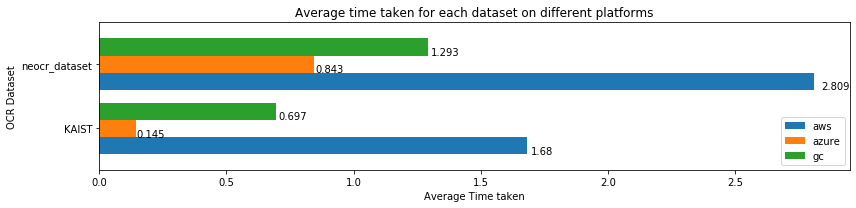

In [12]:
#plt.figure(figsize=(1, 1))
pivot_view = pd.pivot_table(pdOcrSuccess, index='dataset', columns='label', values='time', aggfunc=np.mean)

ax = pivot_view.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('OCR Dataset')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

In [10]:
pdOcrSuccess

,file_name,dataset,label,status,score,time,actual_str,detected_str
20732,001.jpg,KAIST,aws,0,0.733333,1.372061,yuppieweinsberg,yuppiefusionbeerweinsbergt11491989ls
20733,001.jpg,KAIST,azure,0,0.500000,0.092751,yuppieweinsberg,unnsna
20734,001.jpg,KAIST,gc,0,0.733333,0.715152,yuppieweinsberg,yuppiefusionbeerweinsberge
20735,002.jpg,KAIST,aws,0,0.500000,1.173068,doobob,doobobsaxzadoobob
20736,002.jpg,KAIST,azure,0,0.166667,0.063227,doobob,00060b
...,...,...,...,...,...,...,...,...
24533,s.jpg,KAIST,azure,0,0.000000,0.063267,puma,
24534,u.jpg,KAIST,aws,0,0.750000,0.928067,aroo,araoroobakeryts3
24535,u.jpg,KAIST,azure,0,0.500000,0.064549,aroo,az
24536,v.jpg,KAIST,azure,0,1.000000,0.071155,thdbodyshop,shop


In [33]:
import warnings
warnings.filterwarnings('ignore')